In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.7308


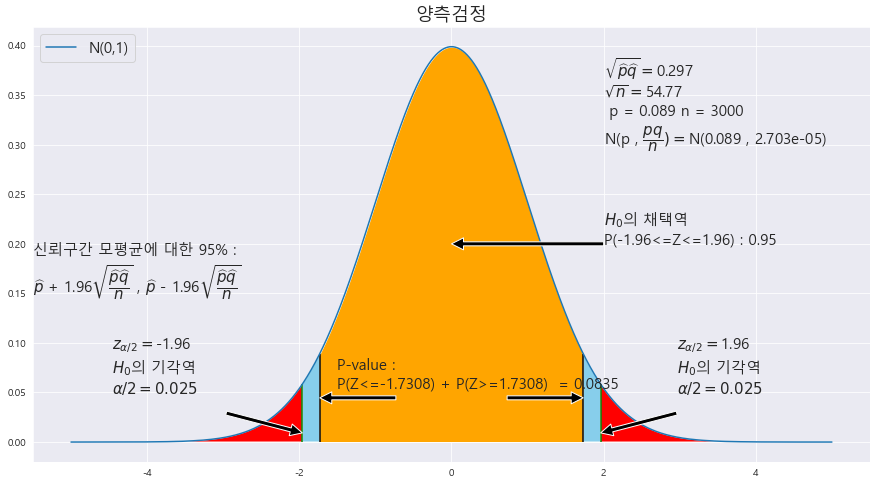

In [18]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

ax.set_title('양측검정' ,fontsize = 18)
RATIO = round(294/3000 , 4)
n = 3000
MEANS = 0.089
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)


#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)



# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================

z_1 = round((RATIO-MEANS)/STDS,4)
print(z_1)
z_1 = abs(z_1)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1 - scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)




ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,8)})',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.4894


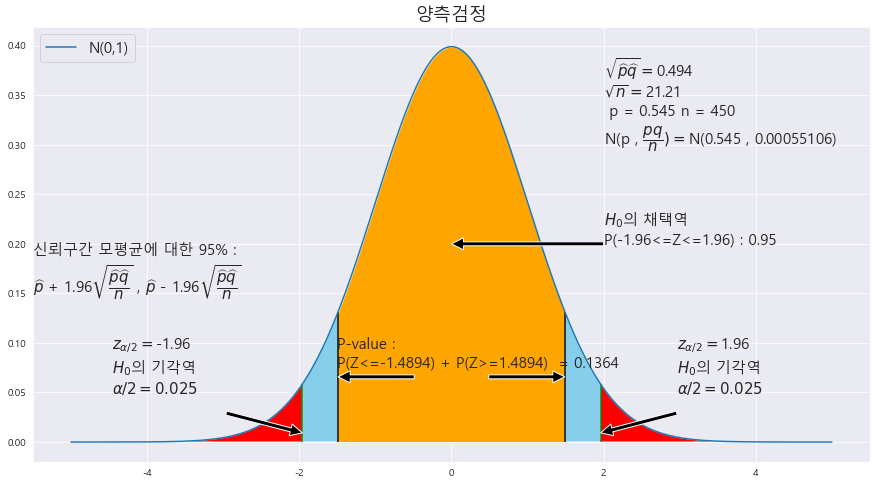

In [19]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

ax.set_title('양측검정' ,fontsize = 18)
RATIO = round(261/450 , 4)
n = 450
MEANS = 0.545
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)


#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)



# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================

z_1 = round((RATIO-MEANS)/STDS,4)
print(z_1)
z_1 = abs(z_1)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1 - scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)




ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,8)})',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0


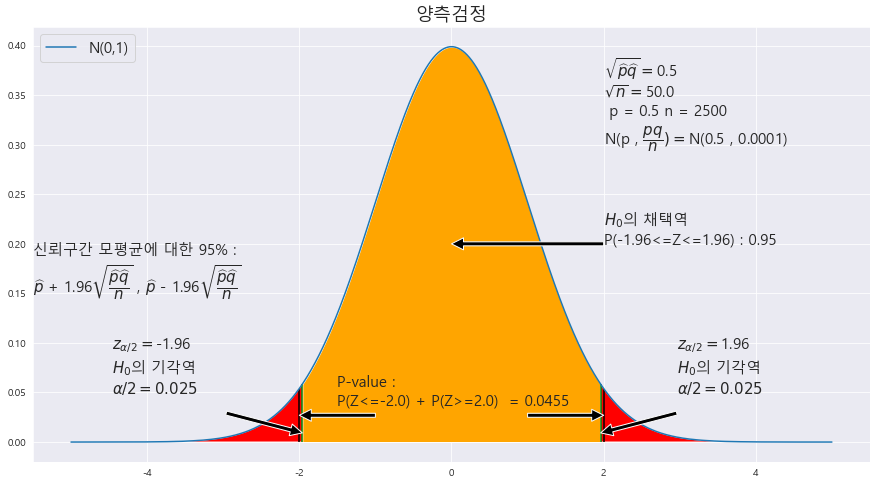

In [20]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

ax.set_title('양측검정' ,fontsize = 18)
RATIO = round(1300/2500 , 4)
n = 2500
MEANS = 0.5
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)


#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)



# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================

z_1 = round((RATIO-MEANS)/STDS,4)
print(z_1)
z_1 = abs(z_1)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1 - scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)




ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,8)})',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.2658


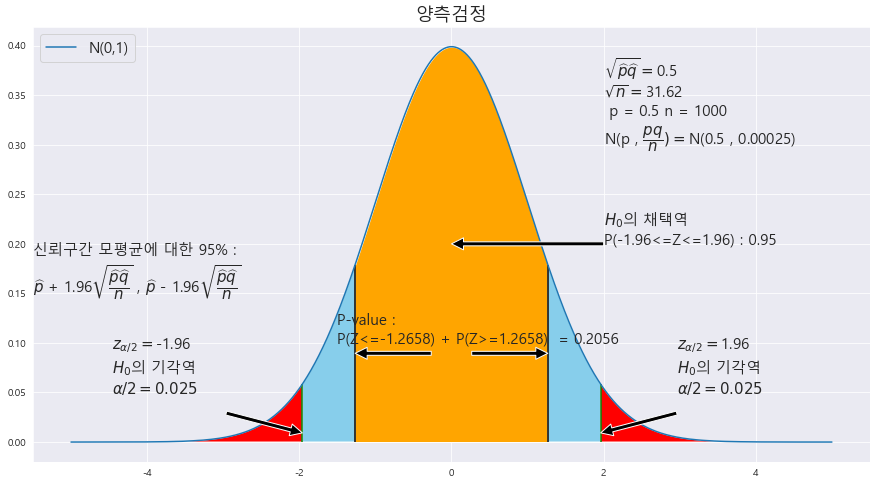

In [21]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

ax.set_title('양측검정' ,fontsize = 18)
RATIO = round(520/1000 , 4)
n = 1000
MEANS = 0.5
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)


#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)



# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================

z_1 = round((RATIO-MEANS)/STDS,4)
print(z_1)
z_1 = abs(z_1)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1 - scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)




ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,8)})',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.2614


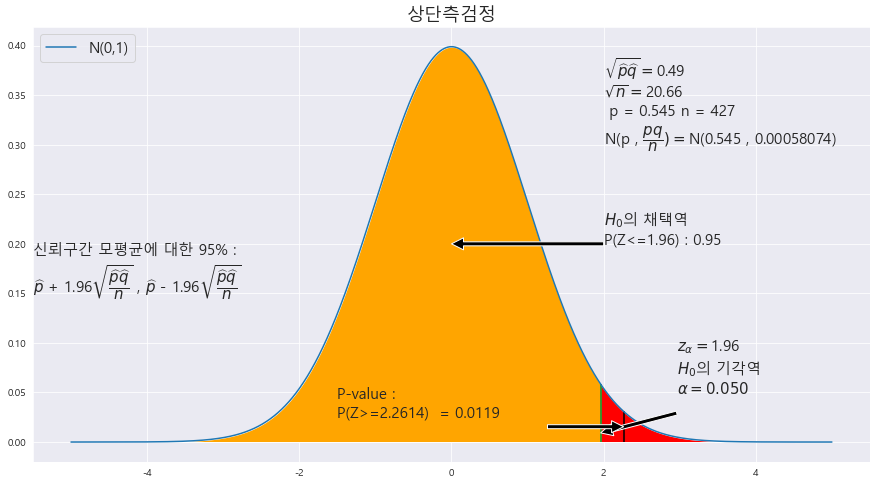

In [25]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

ax.set_title('상단측검정' ,fontsize = 18)
RATIO = round(256/427 , 4)
n = 427
MEANS = 0.545
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)


#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
area = round((1-area),2)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha = {%.3f}$' % area,fontsize=15)
# ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)



# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================

z_1 = round((RATIO-MEANS)/STDS,4)
print(z_1)
z_1 = abs(z_1)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1)  , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = 1 - scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z>={z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)




ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,8)})',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-1.567


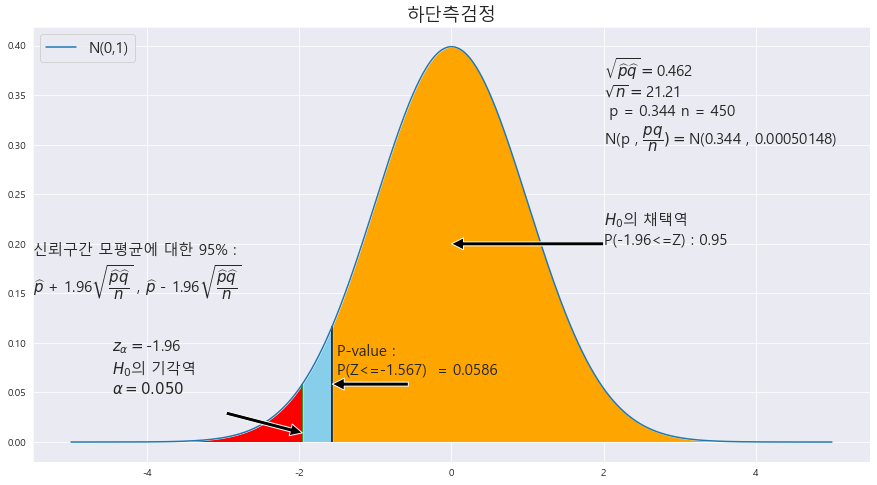

In [28]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

ax.set_title('하단측검정' ,fontsize = 18)
RATIO = round(139/450 , 4)
n = 450
MEANS = 0.344
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)


#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
# ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
area = round((1-area) ,3)
# ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)



# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================

z_1 = round((RATIO-MEANS)/STDS,4)
print(z_1)
z_1 = abs(z_1)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1)


# ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
# plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)




ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,8)})',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96
1.89
1.96


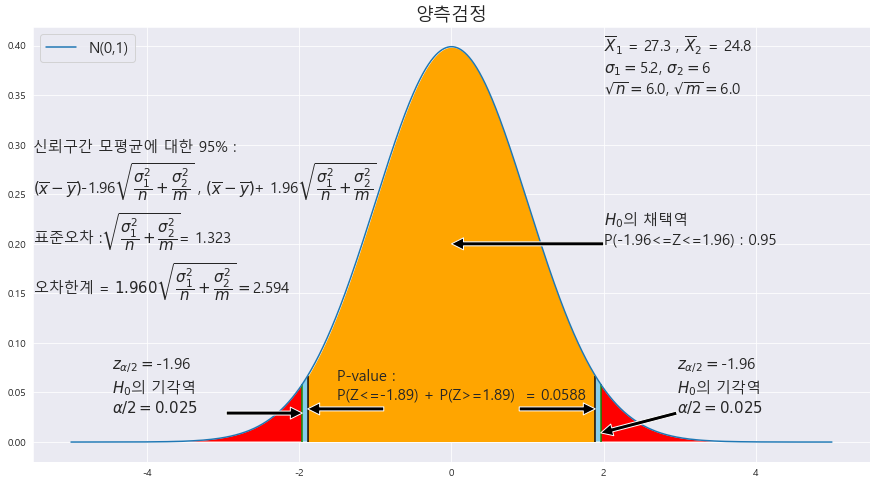

In [48]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 27.3
MEANS_B = 24.8
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 5.2
std_b = 6
n_a = 36
n_b = 36
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준
# trust = trust - (100-trust)
t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))


area = round( (1-area) / 2 , 3)
ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)

ax.text(-2.5 -t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) | (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) +1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

print(t_1)

In [37]:
A = pd.DataFrame(columns = ['표본평균' , '모표준편차'] , index = ['A' , 'B'])
A['표본평균'] = [27.3 , 24.8]
A['모표준편차'] = [5.2 , 6.0]
A

,표본평균,모표준편차
A,27.3,5.2
B,24.8,6.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.645


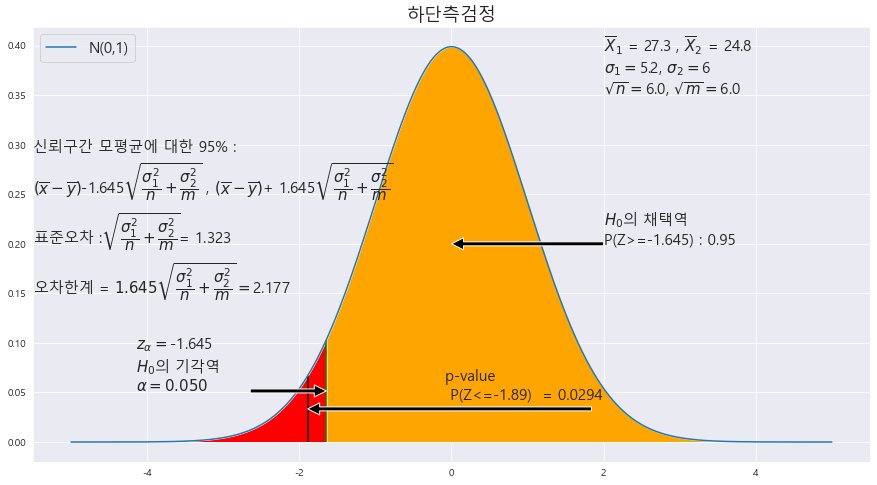

In [59]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 27.3
MEANS_B = 24.8
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 5.2
std_b = 6
n_a = 36
n_b = 36
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('하단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf((trust/100)) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z>={-t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
# ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

# ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역',fontsize=15)
area = 1-area
ax.text(-2.5 -t_1 , annotate_len , r'$z_{\alpha} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1)


ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
# plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=( -z_1 ,  annotate_len), xytext=(z_1-0.05, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-.09 , annotate_len+0.01 , f'p-value \n P(Z<={-z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)



#
# ax.text(2 , .35,  r'$\overline{X}$ = ' +f'{MEANS}\n'+ r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{STDS,3)}',fontsize=15)

b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

In [55]:
A = pd.DataFrame(columns = ['표본평균' , '모표준편차'] , index = ['사회계열' , '공학계열'])
A['표본평균'] = [301.5 , 317.1 ]
A['모표준편차'] = [ 38.6, 43.3]
A

,표본평균,모표준편차
사회계열,301.5,38.6
공학계열,317.1,43.3


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.645


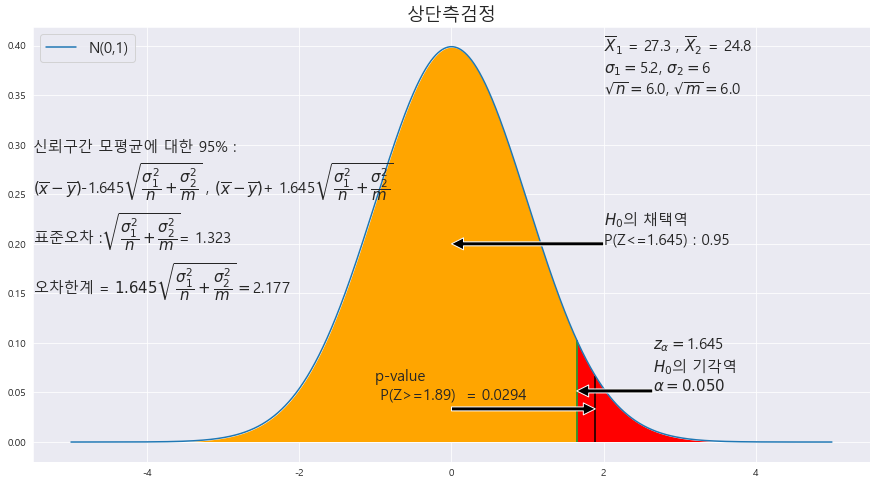

In [71]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 27.3
MEANS_B = 24.8
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 5.2
std_b = 6
n_a = 36
n_b = 36
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('상단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf((trust/100)) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
# ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

# ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역',fontsize=15)
area = 1-area
ax.text(1 + t_1  , annotate_len , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
# plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=( z_1 ,  annotate_len), xytext=(0, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1 , annotate_len+0.01 , f'p-value \n P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

In [67]:
print(scipy.stats.norm.cdf(1.96))

0.9750021048517795


In [68]:
A = pd.DataFrame(columns = ['표본평균' , '표본표준편차' , '표본의 크기'] , index = ['비타민 C를 복용한 그룹' , '비타민 C를 복용 안한 그룹'])
A['표본평균'] = [5.2 , 5.8 ]
A['표본표준편차'] = [ 1.4, 2.2]
A['표본의 크기'] = [100 , 65]
A

,표본평균,표본표준편차,표본의 크기
비타민 C를 복용한 그룹,5.2,1.4,100
비타민 C를 복용 안한 그룹,5.8,2.2,65


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.645


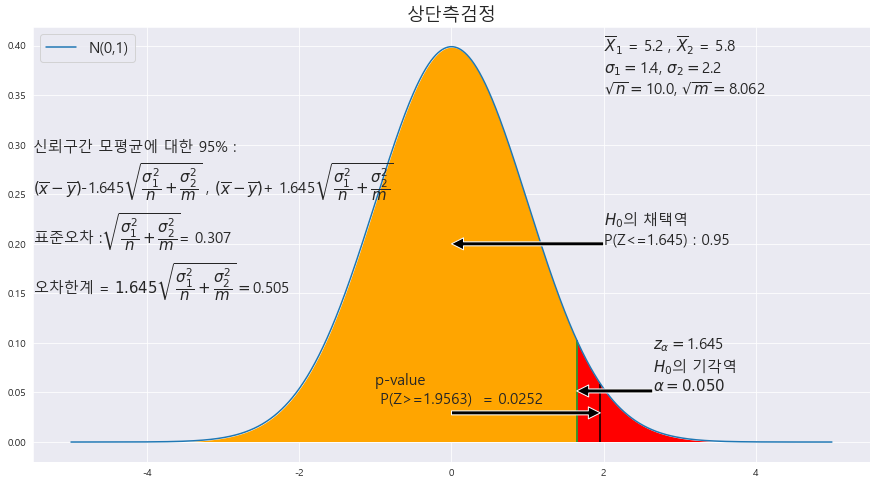

In [79]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 5.2
MEANS_B = 5.8
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 1.4
std_b = 2.2
n_a = 100
n_b = 65
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('상단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf((trust/100)) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
# ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

# ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역',fontsize=15)
area = 1-area
ax.text(1 + t_1  , annotate_len , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,4)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
# plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=( z_1 ,  annotate_len), xytext=(0, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1 , annotate_len+0.01 , f'p-value \n P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.645


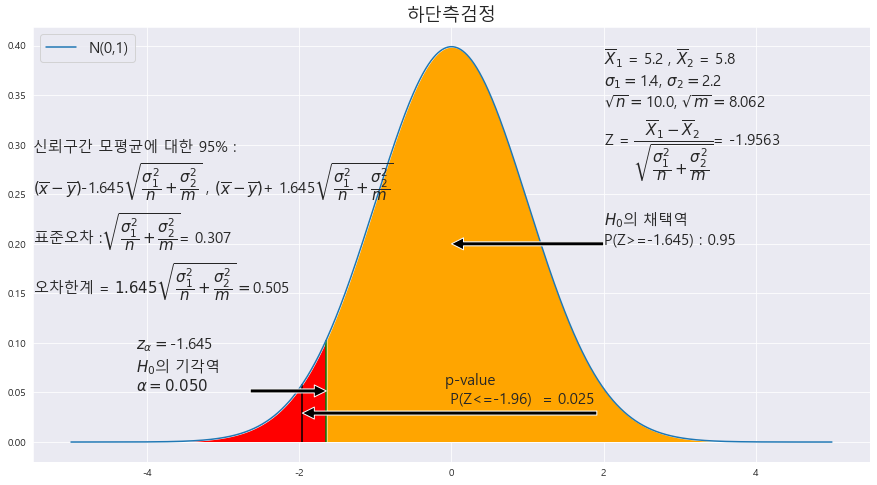

In [85]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 5.2
MEANS_B = 5.8
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 1.4
std_b = 2.2
n_a = 100
n_b = 65
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('하단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf((trust/100)) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z>={-t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
# ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

# ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역',fontsize=15)
area = 1-area
ax.text(-2.5 -t_1 , annotate_len , r'$z_{\alpha} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .3,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}\n'
        + r'Z = $\dfrac{\overline{X}_{1} - \overline{X}_{2}} {\sqrt{\dfrac{\sigma_{1}^{2}}{n} + \dfrac{\sigma_{2}^{2}}{m}}}$'
        + f'= {round(MEANS / STDS,4)}' ,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1)


ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
# plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=( -z_1 ,  annotate_len), xytext=(z_1-0.05, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-.09 , annotate_len+0.01 , f'p-value \n P(Z<={-z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)



#
# ax.text(2 , .35,  r'$\overline{X}$ = ' +f'{MEANS}\n'+ r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{STDS,3)}',fontsize=15)

b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96
1.89
1.96


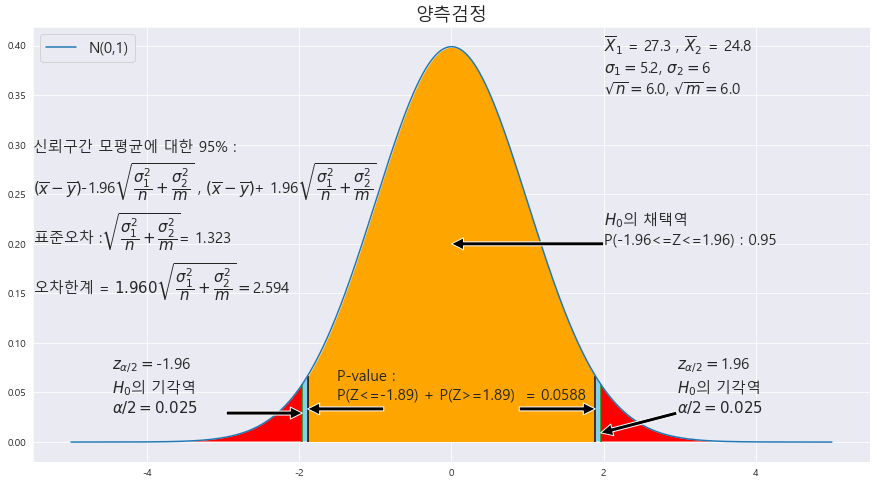

In [74]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 27.3
MEANS_B = 24.8
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 5.2
std_b = 6
n_a = 36
n_b = 36
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준
# trust = trust - (100-trust)
t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))


area = round( (1-area) / 2 , 3)
ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)

ax.text(-2.5 -t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) | (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) +1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

print(t_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96
-1.9
1.96


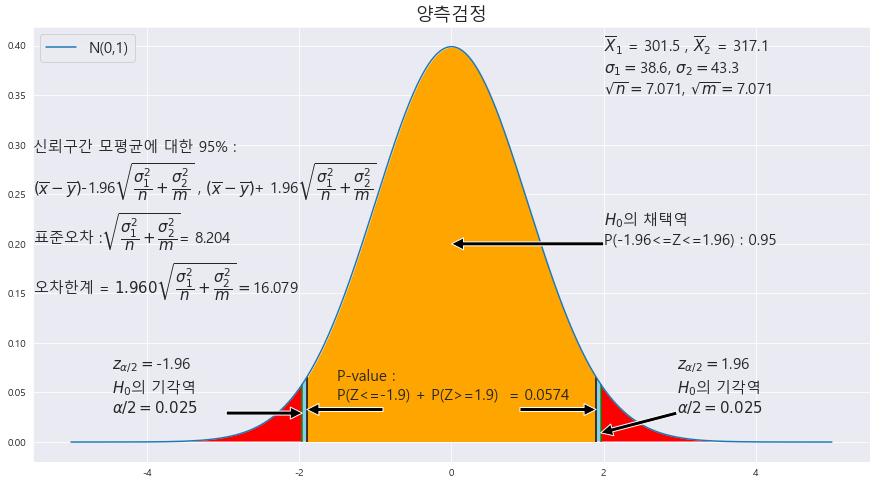

In [76]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 301.5
MEANS_B = 317.1
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 38.6
std_b = 43.3
n_a = 50
n_b = 50
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준
# trust = trust - (100-trust)
t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))


area = round( (1-area) / 2 , 3)
ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)

ax.text(-2.5 -t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) | (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) +1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

print(t_1)

In [86]:
A = pd.DataFrame(columns = ['표본평균' , '표본표준편차' , '표본의 크기'] , index = ['A' , 'B'])
A['표본평균'] = [201 , 199 ]
A['표본표준편차'] = [ 5, 6]
A['표본의 크기'] = [65 , 96]
A

,표본평균,표본표준편차,표본의 크기
A,201,5,65
B,199,6,96


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96
2.29
1.96


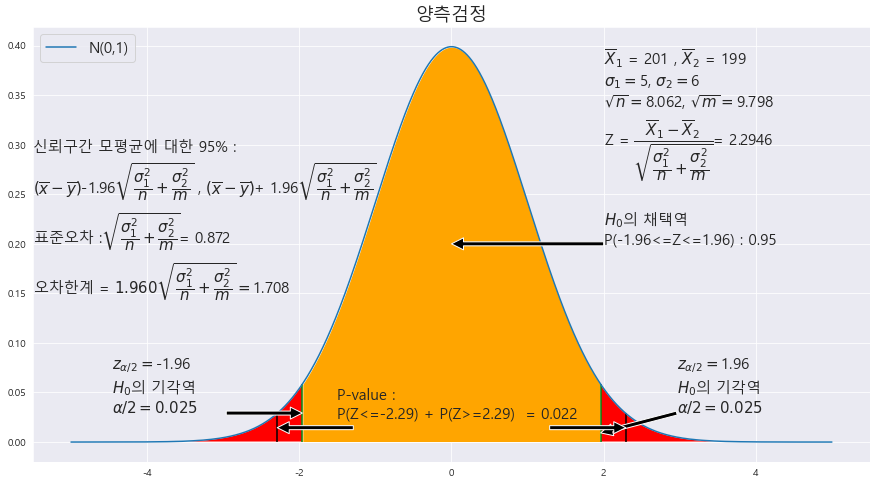

In [90]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 201
MEANS_B = 199
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 5
std_b = 6
n_a = 65
n_b = 96
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준
# trust = trust - (100-trust)
t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))


area = round( (1-area) / 2 , 3)
ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)

ax.text(-2.5 -t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .3,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}' + f'\n' + r'Z = $\dfrac{\overline{X}_{1} - \overline{X}_{2}} {\sqrt{\dfrac{\sigma_{1}^{2}}{n} + \dfrac{\sigma_{2}^{2}}{m}}}$'
        + f'= {round(MEANS / STDS,4)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) | (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) +1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

print(t_1)

In [91]:
A = pd.DataFrame(columns = ['평균' , '표준편차'] , index = ['A회사' , 'B회사'])
A['평균'] = [13.46 , 13.95 ]
A['표준편차'] = [1.46, 1.33]
A

,평균,표준편차
A회사,13.46,1.46
B회사,13.95,1.33


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96
-1.98
1.96


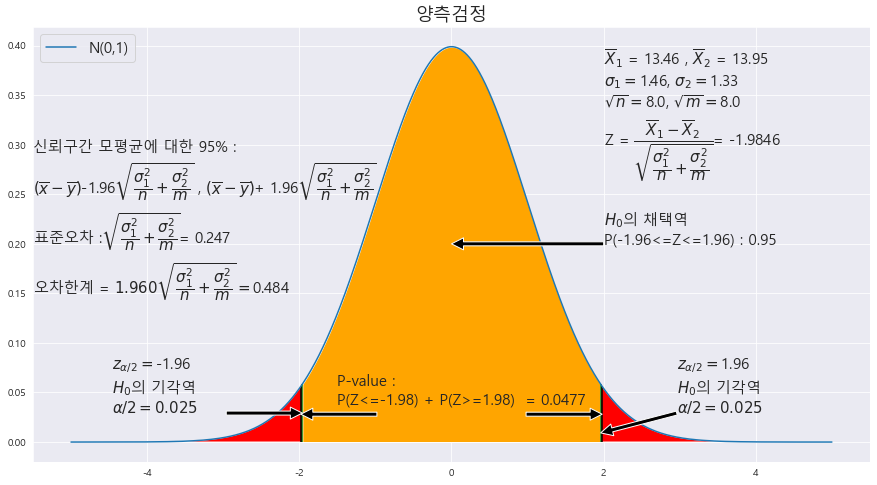

In [92]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 13.46
MEANS_B = 13.95
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 1.46
std_b = 1.33
n_a = 64
n_b = 64
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준
# trust = trust - (100-trust)
t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1)  , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))


area = round( (1-area) / 2 , 3)
ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)

ax.text(-2.5 -t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .3,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}' + f'\n' + r'Z = $\dfrac{\overline{X}_{1} - \overline{X}_{2}} {\sqrt{\dfrac{\sigma_{1}^{2}}{n} + \dfrac{\sigma_{2}^{2}}{m}}}$'
        + f'= {round(MEANS / STDS,4)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
z_1 = abs(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-z_1) | (x>=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) | (x>=t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) +1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

print(t_1)